In [1]:
import pandas as pd
from datetime import date,timedelta



In [2]:
today=date.today()
d1=today.strftime("%Y-%m-%d")
end_date=d1
d2=date.today()-timedelta(days=740)
d2=d2.strftime("%Y-%m-%d")
start_date=d2
print("Your data will be between these dates",start_date,end_date)

Your data will be between these dates 2023-09-04 2025-09-13


In [3]:
import yfinance as yf
import pandas as pd

# Define ticker and dates
ticker = "GS"
start_date = "2023-01-01"
end_date = "2025-01-01"

# Download data
df = yf.download(ticker, start=start_date, end=end_date, progress=False)

# If columns are multi-index, flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]



print(df.head())


C:\Users\Rudraksh kaushik\AppData\Local\Temp\ipykernel_4340\3319411545.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


                 Close        High         Low        Open   Volume
Date                                                               
2023-01-03  322.686035  324.904262  319.507823  322.014975  1589700
2023-01-04  324.065460  326.498034  321.623528  324.373016  1881000
2023-01-05  320.393219  321.679419  317.019290  320.849903  1397800
2023-01-06  324.419586  325.277063  317.774265  323.692607  3097800
2023-01-09  329.005157  332.267248  325.743067  327.961293  1989000


In [4]:
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2024-12-24,573.965576,573.965576,562.708652,565.505677,913400
2024-12-26,572.429138,573.768591,568.755636,569.395818,1092000
2024-12-27,567.455688,573.148199,562.698806,568.263280,1486000
2024-12-30,564.865479,567.298110,556.543414,558.680600,1265900
2024-12-31,563.949585,568.184464,561.763228,566.362500,1055800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   502 non-null    float64
 1   High    502 non-null    float64
 2   Low     502 non-null    float64
 3   Open    502 non-null    float64
 4   Volume  502 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB


In [6]:
print(df.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [7]:
df = df.reset_index()   # brings Date back as a column
df2 = df[['Date','Close']]


In [8]:
df2.head()

,Date,Close
0,2023-01-03,322.686035
1,2023-01-04,324.065460
2,2023-01-05,320.393219
3,2023-01-06,324.419586
4,2023-01-09,329.005157


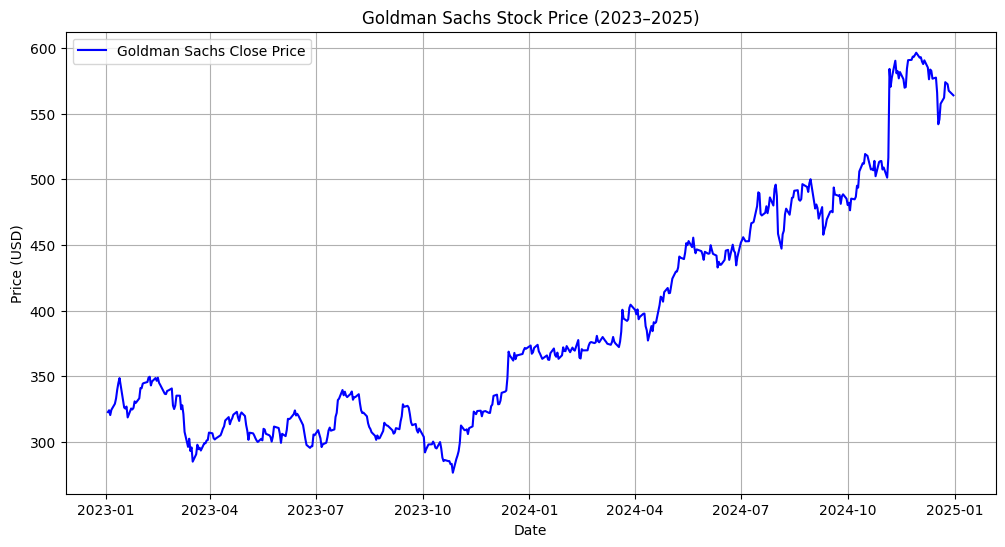

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Goldman Sachs Close Price", color="blue")
plt.title("Goldman Sachs Stock Price (2023–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df.tail()

,Date,Close,High,Low,Open,Volume
497,2024-12-24,573.965576,573.965576,562.708652,565.505677,913400
498,2024-12-26,572.429138,573.768591,568.755636,569.395818,1092000
499,2024-12-27,567.455688,573.148199,562.698806,568.263280,1486000
500,2024-12-30,564.865479,567.298110,556.543414,558.680600,1265900
501,2024-12-31,563.949585,568.184464,561.763228,566.362500,1055800


In [11]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,502,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,2024-01-01 19:56:10.517928192,387.810258,391.589351,384.036888,387.617359,2.264635e+06
min,2023-01-03 00:00:00,276.496948,284.470148,275.972377,279.873152,4.601000e+05
25%,2023-07-05 06:00:00,315.118370,318.215047,311.478088,314.933330,1.608000e+06
50%,2024-01-02 12:00:00,365.909271,368.688161,362.187979,365.865979,1.979750e+06
75%,2024-07-02 18:00:00,452.909370,456.188962,447.919448,452.344594,2.587175e+06
max,2024-12-31 00:00:00,596.400696,602.644690,594.920881,599.739393,1.444830e+07
std,NaN,86.079914,87.122361,85.357626,86.309680,1.195663e+06


In [12]:
## Stationarity check on data
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df):
    result=adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value %f' % result[1])
    if result[1]<=0.05:
        print("Reject the null Hypothesis.Data is Staionary")
    else:
        print("Fail to reject the null hypothesis,Data is not stationary")

check_stationarity(df['Close'])            

ADF Statistic: 0.228070
p-value 0.973793
Fail to reject the null hypothesis,Data is not stationary


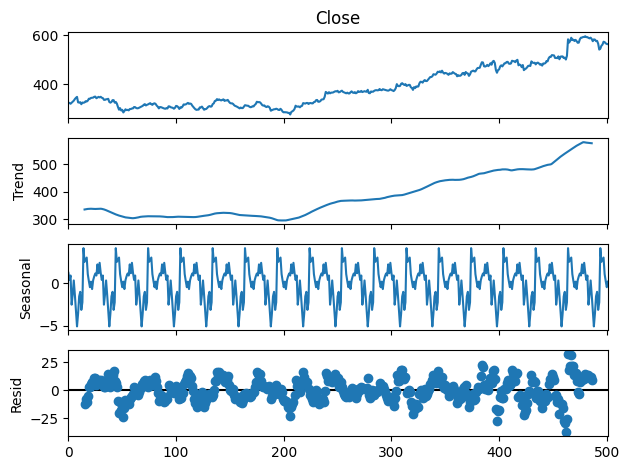

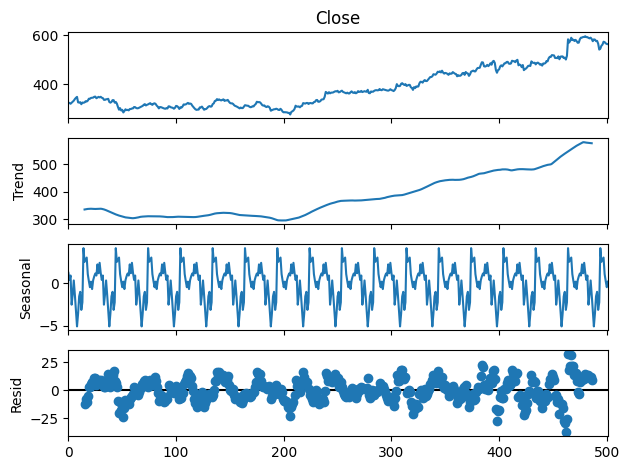

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df['Close'],model='additive',period=30)
decompose.plot()

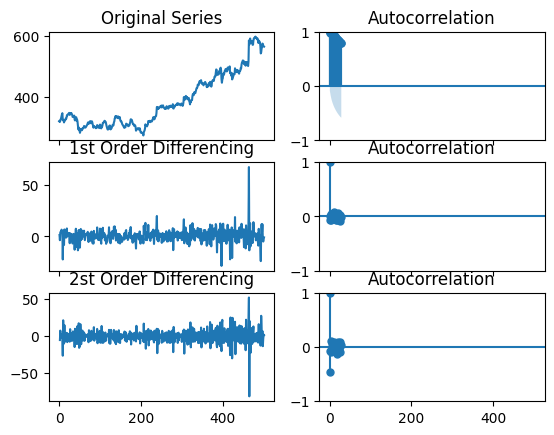

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

#Original Series
fig,axes=plt.subplots(3,2,sharex=True)
axes[0,0].plot(df['Close']);axes[0,0].set_title('Original Series')
plot_acf(df['Close'],ax=axes[0,1])

# 1st Differencing
axes[1,0].plot(df['Close'].diff());axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(),ax=axes[1,1])

# 1st Differencing
axes[2,0].plot(df['Close'].diff().diff());axes[2,0].set_title('2st Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(),ax=axes[2,1])

plt.show()



## Lets find p-value

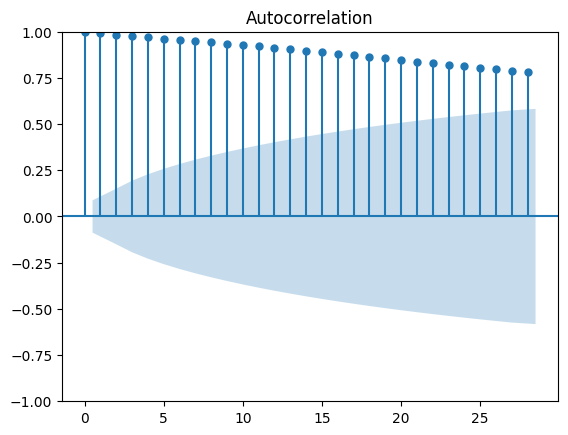

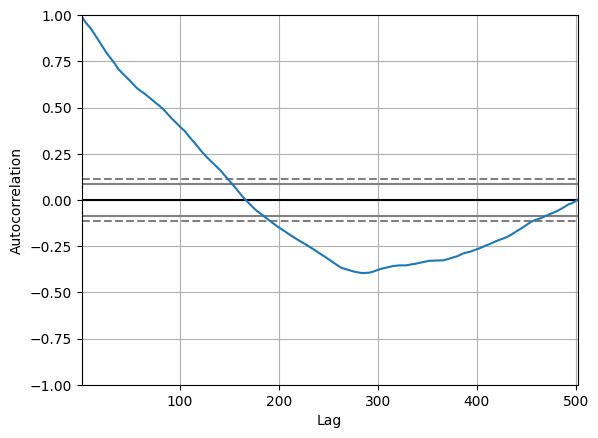

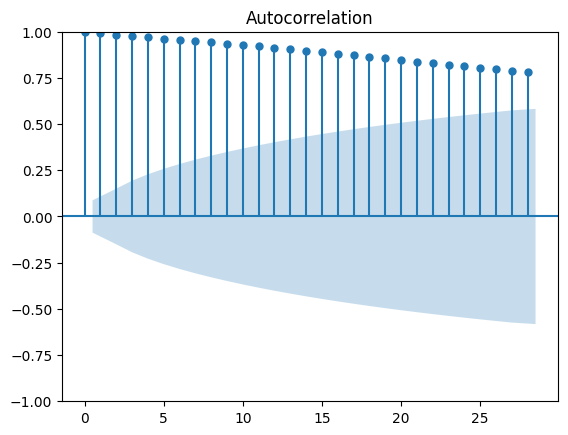

In [16]:
## Plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])

plot_acf(df['Close'],alpha=0.05)

In [17]:
from statsmodels.tsa.stattools import acf,pacf
x_acf=pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.992387
2   0.984676
3   0.977080
4   0.969058
5   0.961380
6   0.954263
7   0.947562
8   0.941533
9   0.935908
10  0.928675
11  0.921029
12  0.912998
13  0.904551
14  0.896303
15  0.888338
16  0.880276
17  0.872023
18  0.863796
19  0.855277
20  0.847115
21  0.838571
22  0.829698
23  0.821021
24  0.812642
25  0.804721
26  0.796677
27  0.789239


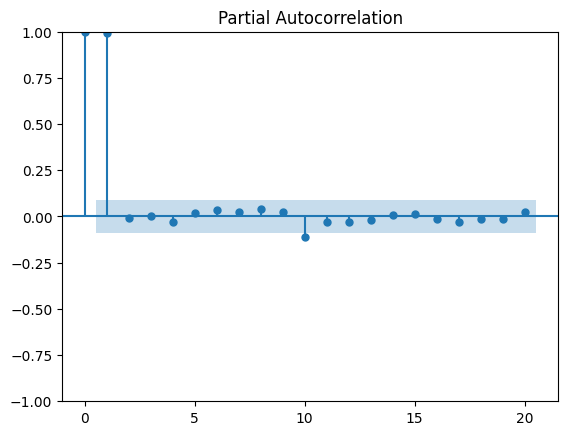

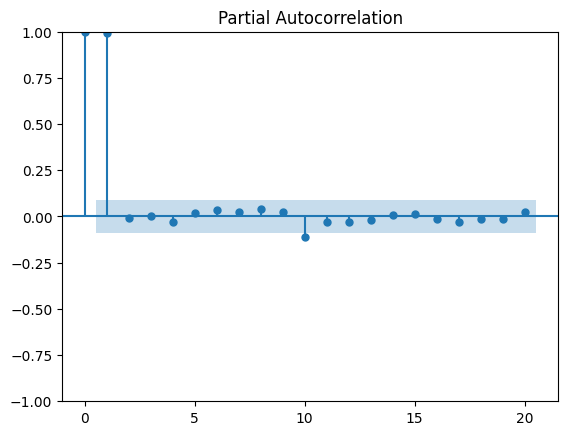

In [18]:
from statsmodels.tsa.stattools import acf,pacf
plot_pacf(df['Close'],lags=20,alpha=0.05)

In [ ]:
p=6
d=1
q=2

In [19]:
## Lets run arima with pmdarmia
from pmdarima.arima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [20]:
from statsmodels.tsa.arima.model import ARIMA
p,d,q=7,1,2
model=ARIMA(df['Close'],order=(p,d,q))
model=model.fit()
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  502
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -1646.563
Date:                Sat, 13 Sep 2025   AIC                           3313.126
Time:                        20:30:03   BIC                           3355.292
Sample:                             0   HQIC                          3329.670
                                - 502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0708      6.009     -0.012      0.991     -11.849      11.707
ar.L2          0.4874      4.504      0.108      0.914      -8.341       9.316
ar.L3          0.0351      0.268      0.131      0.8

502    564.025082
503    563.903578
504    564.162382
505    564.132973
506    564.219948
507    564.187702
508    564.216214
509    564.200347
510    564.210607
511    564.205609
512    564.209564
513    564.208212
514    564.209602
515    564.209300
516    564.209731
517    564.209699
518    564.209824
519    564.209846
520    564.209881
521    564.209903
522    564.209913
523    564.209926
524    564.209929
525    564.209936
526    564.209937
527    564.209940
528    564.209941
529    564.209942
530    564.209942
531    564.209943
532    564.209943
Name: predicted_mean, dtype: float64


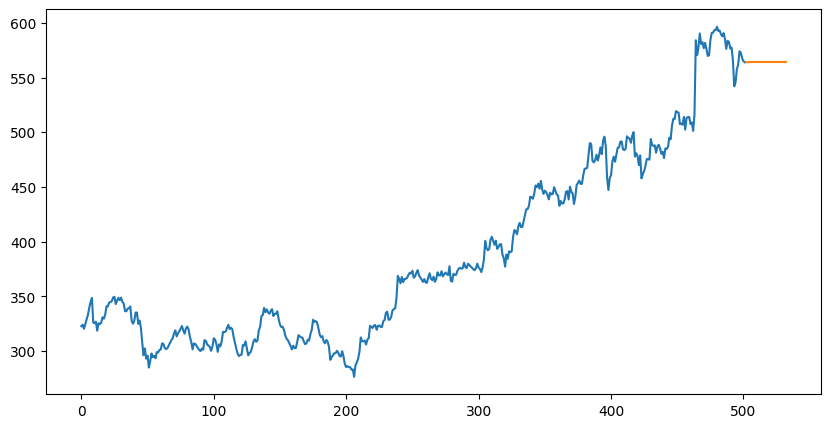

In [25]:
# Predictmext 30 days
forecast=model.predict(len(df["Close"]),len(df['Close'])+30)
print(forecast)


# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='Actual')
plt.plot(forecast,label='Forecast')

In [27]:
## Lets run Sarima
import statsmodels.api as sm
import warnings
p,d,q=2,1,2
model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(p,d,q),
                                seasonal_order=(p,d,q,12))

In [28]:
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  502
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1624.620
Date:                            Sat, 13 Sep 2025   AIC                           3267.240
Time:                                    20:43:48   BIC                           3304.971
Sample:                                         0   HQIC                          3282.059
                                            - 502                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5425      0.691     -0.785      0.433      -1.897       0.813
ar.L2          0.1465      0.625   

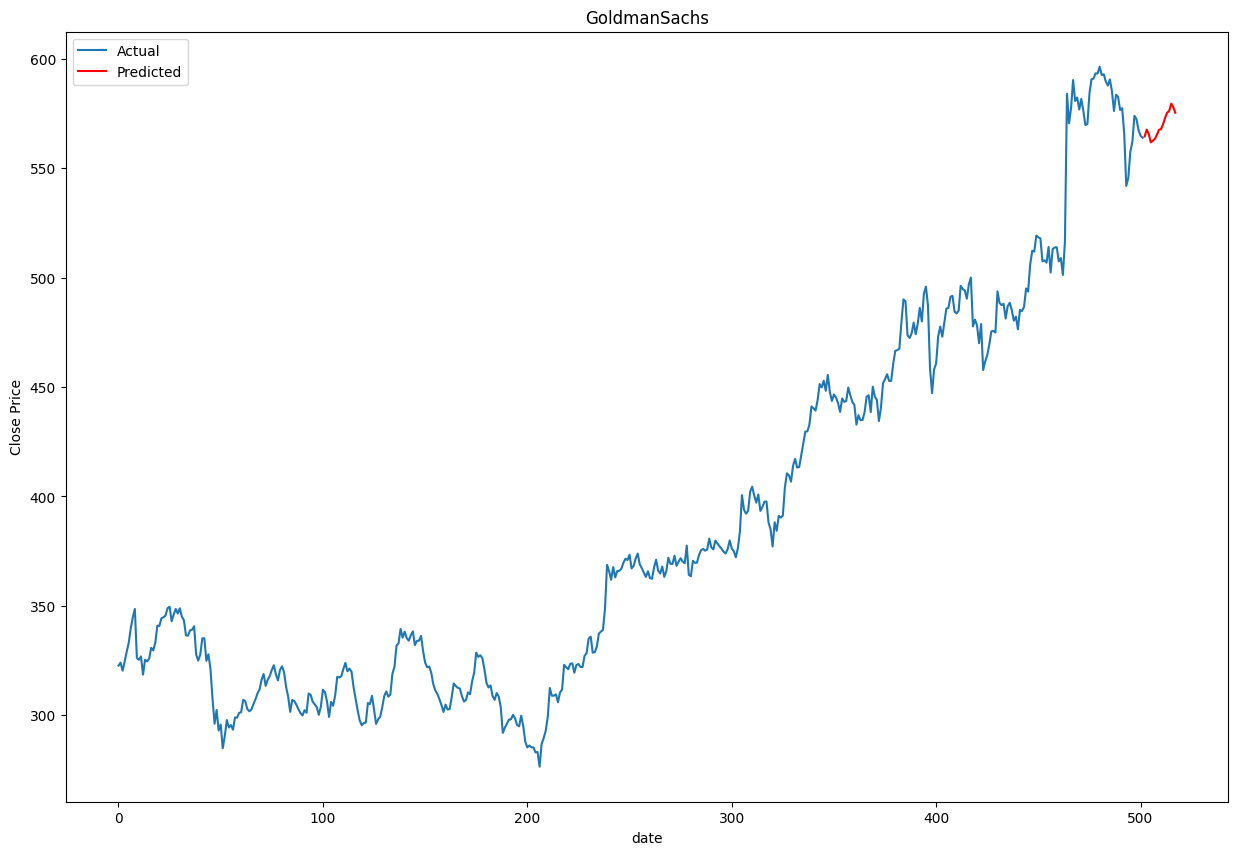

In [30]:
predictions=model.predict(start=len(df['Close']),end=len(df['Close'])+15)

plt.figure(figsize=(15,10))
plt.plot(df["Close"],label='Actual')
plt.plot(predictions,color='red',label='Predicted')
plt.xlabel('date')
plt.ylabel('Close Price')
plt.title('GoldmanSachs')
plt.legend(loc='upper left')
plt.show()